In [11]:
#this functions are in the folder /results (add them to your path using sys.path.append() and install with conda or pip if something is missing
import sys
sys.path.insert(1, 'results')

from model import *
from plot_functions import * 
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'png' ## 'svg'

%load_ext autoreload
%autoreload 2


In [12]:
#Palettes
# print(sns.color_palette("tab10").as_hex())
# sns.palplot(sns.color_palette("tab10"))
# plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(100/2) ;


nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+57) )/360)
p_dist2 = int((N * (90+170) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [4]:
def hemap(an, stimulation, order):
    dims=np.shape(an[4])
    stimon = 100/2
    stimoff = 100/2 + floor(100/2) ;
    stim2on = 1000/2
    stim2off = 1000/2 + floor(100/2) ;  
    
    RE_sorted=flipud(an[4])
    ax = sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=18,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 6, 12, 18], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    
    if order==1:
        plt.gca().plot([stimon, stimon+400], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=3) 
    if order==2:
        plt.gca().plot([500, 900], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t) 
    #   
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    #plt.gca().set_yticklabels(['0','','$^\pi$', '', '2$^\pi$'])
    plt.gca().set_yticklabels(['0','','180', '', '360'])
    
    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(570, -45)
    
    ##line stims       
    plt.plot([0, stimon], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stimon, stimon], [-15, -40], 'k-', linewidth=3)
    plt.plot([stimon, stimoff], [-40, -40], 'k-', linewidth=3)
    plt.plot([stimoff, stimoff], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stimoff, stim2on], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stim2on, stim2on], [-15, -40], 'k-', linewidth=3)
    plt.plot([stim2on, stim2off], [-40, -40], 'k-', linewidth=3)
    plt.plot([stim2off, stim2off], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stim2off, dims[1]], [-15, -15], 'k-', linewidth=3)
    #time
    plt.plot([dims[1]-500, dims[1]], [540, 540], 'k-', linewidth=3)
    plt.text(dims[1]-300, 600, '1s', fontsize=20)
    # stimulation
    if stimulation=='ON':
        plt.text(dims[1]-300, 70, stimulation, weight= 'heavy', color='w', fontsize=20)
    if stimulation=='OFF':
        plt.text(dims[1]-300, 70, stimulation, weight= 'heavy', color='k', fontsize=20)




## Expectation

Examples and tuning curves

In [4]:
n_simuls=100
numcores = multiprocessing.cpu_count() -1
print('Number cores: '+ str(numcores))

from scipy.optimize import curve_fit 
def gauss(x,mu,sigma,A):
        return A*exp(-(x-mu)**2/2/sigma**2)

N=512    

Number cores: 7


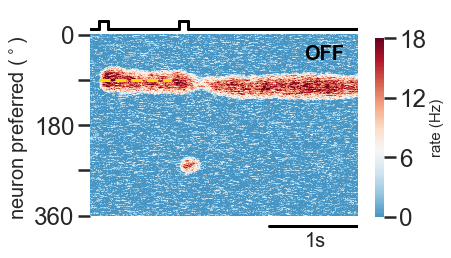

In [10]:
fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'

off_far_1= model(totalTime= 3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(off_far_1, stimulation='OFF', order=1)


In [5]:
fee=1
fei=1
fie=1
fii=1

OFF = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

In [6]:
dff_offs=[]

for n_s in range(n_simuls):
    ## runing average for each time of one rimulation
    l=[pd.DataFrame(OFF[n_s][4][:,i]).rolling(window=40, min_periods=1).mean().values for i in range(np.shape(OFF[n_s][4])[1])]
    ## put them in the same datfarame
    dff = pd.concat([pd.DataFrame(np.array(l[i])) for i in range(len(l))], axis=1)
    ##amount to roll (centro al maximo en cada punto!)
    peaks = [np.where(dff.iloc[:, i] == max(dff.iloc[:, i]))[0][0] for i in range(0, np.shape(dff)[1])]
    center = int(len(dff)/2)
    to_roll = [-int(peaks[i]-center) for i in range(len(peaks))]
    #rolled
    for i in range(0, np.shape(dff)[1]):
        dff.iloc[:,i] = np.roll(dff.iloc[:,i], to_roll[i], axis=0)

    #
    col_n = ['IT' for i in range(50)] + ['stim1' for i in range(50)] + ['delay' for i in range(400)] + ['stim2' for i in range(50)] + ['delay' for i in range(950)]
    dff.columns=col_n
    dff_off=dff.copy()
    dff_offs.append(dff_off)


In [7]:
offs_s=[]
std_off_s=[]

for i in range(n_simuls):
    off_m =pd.DataFrame(dff_offs[i]['stim1'].mean(axis=1))
    off_m['cond']='stim1'
    offs_s.append(off_m)
    ## stimation std (gaussian fit)
    Y=np.reshape(pd.DataFrame(dff_offs[i]['stim1'].mean(axis=1)).values, (N)) 
    X=np.reshape(np.linspace(-pi, pi, N), N)     
    param, covs = curve_fit(gauss, X, Y)
    std_off_s.append(param[1])

df_stim_off = pd.concat(offs_s)
df_stim_off.columns=['value', 'cond']
df_stim_off['neuron']= df_stim_off.index
df_stim_off['condition']= 'OFF'



In [8]:
offs_d=[]
std_off_d=[]

for i in range(n_simuls):
    off_m =pd.DataFrame(dff_offs[i]['delay'].mean(axis=1))
    off_m['cond']='delay'
    offs_d.append(off_m)
    ## stimation std (gaussian fit)
    Y=np.reshape(pd.DataFrame(dff_offs[i]['delay'].mean(axis=1)).values, (N)) 
    X=np.reshape(np.linspace(-pi, pi, N), N)     
    param, covs = curve_fit(gauss, X, Y)
    std_off_d.append(param[1])

df_delay_off = pd.concat(offs_d)
df_delay_off.columns=['value', 'cond']
df_delay_off['neuron']= df_delay_off.index
df_delay_off['condition']= 'OFF'


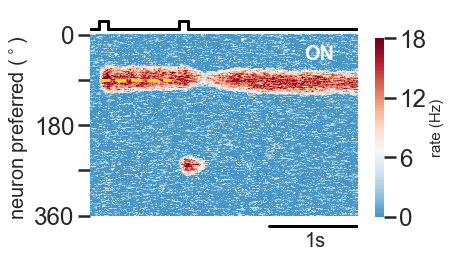

In [37]:
### ON as expectation
fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'

on_close_1= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2+3.55, phantom_onset=50000, phnatom_duration=100)


hemap(on_close_1, stimulation='ON', order=1)
plt.show()

In [9]:
fee=1
fei=1
fie=1
fii=1

ON_E = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False, 
           phantom_st=1.2+3.55, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

In [10]:
dff_ones=[]

for n_s in range(n_simuls):
    ## runing average for each time of one rimulation
    l=[pd.DataFrame(ON_E[n_s][4][:,i]).rolling(window=40, min_periods=1).mean().values for i in range(np.shape(ON_E[n_s][4])[1])]
    ## put them in the same datfarame
    dff = pd.concat([pd.DataFrame(np.array(l[i])) for i in range(len(l))], axis=1)
    ##amount to roll (centro al maximo en cada punto!)
    peaks = [np.where(dff.iloc[:, i] == max(dff.iloc[:, i]))[0][0] for i in range(0, np.shape(dff)[1])]
    center = int(len(dff)/2)
    to_roll = [-int(peaks[i]-center) for i in range(len(peaks))]
    #rolled
    for i in range(0, np.shape(dff)[1]):
        dff.iloc[:,i] = np.roll(dff.iloc[:,i], to_roll[i], axis=0)

    #
    col_n = ['IT' for i in range(50)] + ['stim1' for i in range(50)] + ['delay' for i in range(400)] + ['stim2' for i in range(50)] + ['delay' for i in range(950)]
    dff.columns=col_n
    dff_one=dff.copy()
    dff_ones.append(dff_one)

In [11]:
one_s=[]
std_ones_s=[]

for i in range(n_simuls):
    one_m =pd.DataFrame(dff_ones[i]['stim1'].mean(axis=1))
    one_m['cond']='stim1'
    one_s.append(one_m)
    ## stimation std (gaussian fit)
    Y=np.reshape(pd.DataFrame(dff_ones[i]['stim1'].mean(axis=1)).values, (N)) 
    X=np.reshape(np.linspace(-pi, pi, N), N)     
    param, covs = curve_fit(gauss, X, Y)
    std_ones_s.append(param[1])

df_stim_one = pd.concat(one_s)
df_stim_one.columns=['value', 'cond']
df_stim_one['neuron']= df_stim_one.index
df_stim_one['condition']= 'ON exp.'


In [12]:
one_d=[]
std_ones_d=[]

for i in range(n_simuls):
    one_m =pd.DataFrame(dff_ones[i]['delay'].mean(axis=1))
    one_m['cond']='delay'
    one_d.append(one_m)
    ## stimation std (gaussian fit)
    Y=np.reshape(pd.DataFrame(dff_ones[i]['delay'].mean(axis=1)).values, (N)) 
    X=np.reshape(np.linspace(-pi, pi, N), N)     
    param, covs = curve_fit(gauss, X, Y)
    std_ones_d.append(param[1])

df_delay_one = pd.concat(one_d)
df_delay_one.columns=['value', 'cond']
df_delay_one['neuron']= df_delay_one.index
df_delay_one['condition']= 'ON exp.'

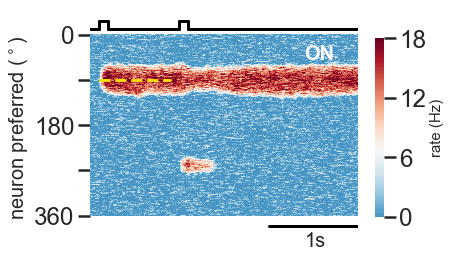

In [39]:
### ON normal
fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'

on_close_2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)


hemap(on_close_2, stimulation='ON', order=1)
plt.show()

In [13]:
fee=1
fei=1
fie=1
fii=1

ON = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

In [14]:
dff_ons=[]

for n_s in range(n_simuls):
    ## runing average for each time of one rimulation
    l=[pd.DataFrame(ON[n_s][4][:,i]).rolling(window=40, min_periods=1).mean().values for i in range(np.shape(ON[n_s][4])[1])]
    ## put them in the same datfarame
    dff = pd.concat([pd.DataFrame(np.array(l[i])) for i in range(len(l))], axis=1)
    ##amount to roll (centro al maximo en cada punto!)
    peaks = [np.where(dff.iloc[:, i] == max(dff.iloc[:, i]))[0][0] for i in range(0, np.shape(dff)[1])]
    center = int(len(dff)/2)
    to_roll = [-int(peaks[i]-center) for i in range(len(peaks))]
    #rolled
    for i in range(0, np.shape(dff)[1]):
        dff.iloc[:,i] = np.roll(dff.iloc[:,i], to_roll[i], axis=0)

    #
    col_n = ['IT' for i in range(50)] + ['stim1' for i in range(50)] + ['delay' for i in range(400)] + ['stim2' for i in range(50)] + ['delay' for i in range(950)]
    dff.columns=col_n
    dff_on=dff.copy()
    dff_ons.append(dff_on)

In [15]:
on_s=[]
std_ons_s=[]

for i in range(n_simuls):
    on_m =pd.DataFrame(dff_ons[i]['stim1'].mean(axis=1))
    on_m['cond']='stim1'
    on_s.append(on_m)
    ## stimation std (gaussian fit)
    Y=np.reshape(pd.DataFrame(dff_ons[i]['stim1'].mean(axis=1)).values, (N)) 
    X=np.reshape(np.linspace(-pi, pi, N), N)     
    param, covs = curve_fit(gauss, X, Y)
    std_ons_s.append(param[1])

    

df_stim_on = pd.concat(on_s)
df_stim_on.columns=['value', 'cond']
df_stim_on['neuron']= df_stim_on.index
df_stim_on['condition']= 'ON'


In [16]:
on_d=[]
std_ons_d=[]

for i in range(n_simuls):
    on_m =pd.DataFrame(dff_ons[i]['delay'].mean(axis=1))
    on_m['cond']='delay'
    on_d.append(on_m)
    ## stimation std (gaussian fit)
    Y=np.reshape(pd.DataFrame(dff_ons[i]['delay'].mean(axis=1)).values, (N)) 
    X=np.reshape(np.linspace(-pi, pi, N), N)     
    param, covs = curve_fit(gauss, X, Y)
    std_ons_d.append(param[1])

df_delay_on = pd.concat(on_d)
df_delay_on.columns=['value', 'cond']
df_delay_on['neuron']= df_delay_on.index
df_delay_on['condition']= 'ON'

In [33]:
df_stim_off['value_norm'] = (df_stim_off['value'] - df_stim_off['value'].mean() ) / df_stim_off['value'].std()
df_stim_one['value_norm'] = (df_stim_one['value'] - df_stim_one['value'].mean() ) / df_stim_one['value'].std()
df_stim_on['value_norm'] = (df_stim_on['value'] - df_stim_on['value'].mean() ) / df_stim_on['value'].std()
df_stims=pd.concat([df_stim_off, df_stim_one, df_stim_on])


In [46]:
##Normalizar a Off
df_stim_off['value_norm'] = (df_stim_off['value'] - df_stim_off['value'].mean() ) / df_stim_off['value'].std()
df_stim_one['value_norm'] = (df_stim_one['value'] - df_stim_off['value'].mean() ) / df_stim_off['value'].std()
df_stim_on['value_norm'] = (df_stim_on['value'] - df_stim_off['value'].mean() ) / df_stim_off['value'].std()
df_stims=pd.concat([df_stim_off, df_stim_one, df_stim_on])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


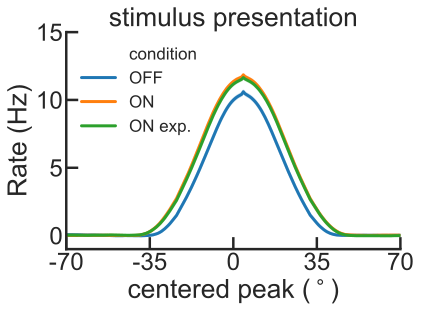

In [47]:

sns.lineplot(x='neuron', y='value', hue='condition', hue_order=['OFF', 'ON', 'ON exp.'], data=df_stims )
plt.legend(frameon=False, prop={'size': 17})
plt.title('stimulus presentation')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('Rate (Hz)')
plt.xlabel('centered peak ($^\circ$)');
plt.ylim(-1,15);
plt.xlim(150,350);
plt.xticks([150, 200, 250, 300, 350], ['-70', '-35', '0', '35', '70']);

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


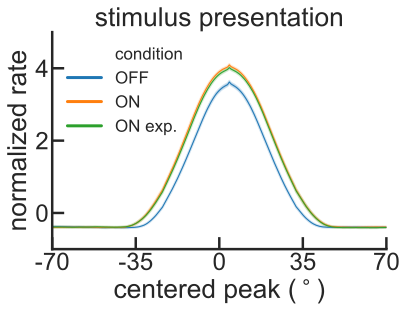

In [50]:
%config InlineBackend.figure_format = 'svg'

sns.lineplot(x='neuron', y='value_norm', hue='condition',
             hue_order=['OFF', 'ON', 'ON exp.'], linewidth=1,
             data=df_stims )

plt.legend(frameon=False, prop={'size': 17})
plt.title('stimulus presentation')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('normalized rate')
plt.xlabel('centered peak ($^\circ$)');
plt.ylim(-1,5);
plt.xlim(150,350);
plt.xticks([150, 200, 250, 300, 350], ['-70', '-35', '0', '35', '70']);

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


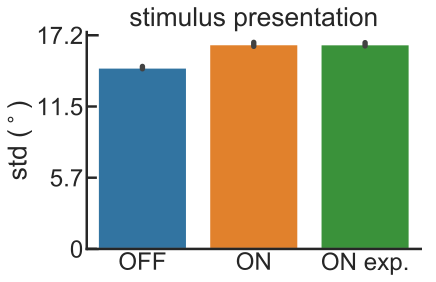

In [49]:
%config InlineBackend.figure_format = 'svg'

## bars of std
s_ons_s = pd.DataFrame(std_ons_s)
s_ons_s['cond']='ON'
s_ons_s.columns=['std fit', 'condition']

s_ones_s = pd.DataFrame(std_ones_s)
s_ones_s['cond']='ON exp.'
s_ones_s.columns=['std fit', 'condition']

s_offs_s = pd.DataFrame(std_off_s)
s_offs_s['cond']='OFF'
s_offs_s.columns=['std fit', 'condition']

df_std=pd.concat([s_ons_s, s_ones_s, s_offs_s])
df_std=df_std.loc[df_std['std fit']>0]

sns.barplot(x='condition', y='std fit', order=['OFF', 'ON', 'ON exp.'], ci=95, data=df_std)
plt.title('stimulus presentation')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('std ($^\circ$)')
plt.xlabel('');
# plt.ylim(-1,15);
# plt.xlim(150,350);
plt.yticks([0, 0.1, 0.2, 0.3], [0, round(0.1*180/np.pi,1), round(0.2*180/np.pi,1), round(0.3*180/np.pi,1)]);

In [36]:
df_delay_off['value_norm'] = (df_delay_off['value'] - df_delay_off['value'].mean() ) / df_delay_off['value'].std()
df_delay_one['value_norm'] = (df_delay_one['value'] - df_delay_one['value'].mean() ) / df_delay_one['value'].std()
df_delay_on['value_norm'] = (df_delay_on['value'] - df_delay_on['value'].mean() ) / df_delay_on['value'].std()
df_delays=pd.concat([df_delay_off, df_delay_one, df_delay_on])


In [42]:
##normalizar a OFF
df_delay_off['value_norm'] = (df_delay_off['value'] - df_delay_off['value'].mean() ) / df_delay_off['value'].std()
df_delay_one['value_norm'] = (df_delay_one['value'] - df_delay_off['value'].mean() ) / df_delay_off['value'].std()
df_delay_on['value_norm'] = (df_delay_on['value'] - df_delay_off['value'].mean() ) / df_delay_off['value'].std()
df_delays=pd.concat([df_delay_off, df_delay_one, df_delay_on])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


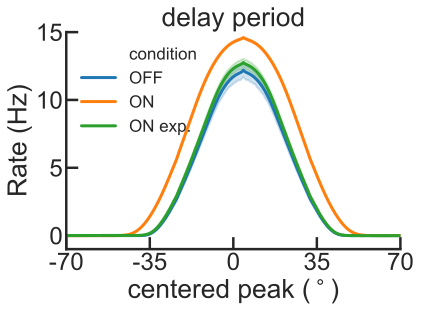

In [43]:
sns.lineplot(x='neuron', y='value', hue='condition', hue_order=['OFF', 'ON', 'ON exp.'], data=df_delays )
plt.legend(frameon=False, prop={'size': 17})
plt.title('delay period')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('Rate (Hz)')
plt.xlabel('centered peak ($^\circ$)');
plt.ylim(-1,15);
plt.xlim(150,350);
plt.xticks([150, 200, 250, 300, 350], ['-70', '-35', '0', '35', '70']);

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


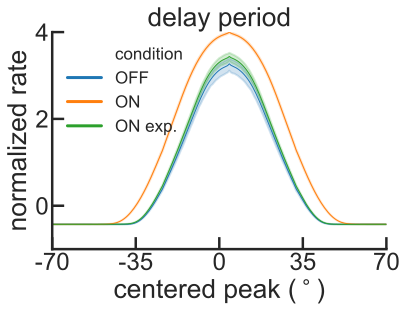

In [44]:
sns.lineplot(x='neuron', y='value_norm', hue='condition', ci=95, 
             hue_order=['OFF', 'ON', 'ON exp.'], 
             linewidth=1, data=df_delays )

plt.legend(frameon=False, prop={'size': 17})
plt.title('delay period')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('normalized rate')
plt.xlabel('centered peak ($^\circ$)');
plt.ylim(-1,4);
plt.xlim(150,350);
plt.xticks([150, 200, 250, 300, 350], ['-70', '-35', '0', '35', '70']);

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


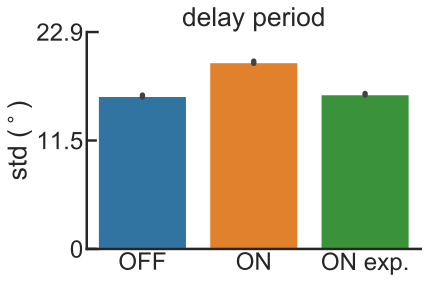

In [45]:
### bars of std
s_ons_d = pd.DataFrame(std_ons_d)
s_ons_d['cond']='ON'
s_ons_d.columns=['std fit', 'condition']

s_ones_d = pd.DataFrame(std_ones_d)
s_ones_d['cond']='ON exp.'
s_ones_d.columns=['std fit', 'condition']

s_offs_d = pd.DataFrame(std_off_d)
s_offs_d['cond']='OFF'
s_offs_d.columns=['std fit', 'condition']

df_std_d=pd.concat([s_ons_d, s_ones_d, s_offs_d])
df_std_d=df_std_d.loc[df_std_d['std fit']>0]

sns.barplot(x='condition', y='std fit', order=['OFF', 'ON', 'ON exp.'], data=df_std_d)
plt.title('delay period')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('std ($^\circ$)')
plt.xlabel('');
# plt.ylim(-1,15);
# plt.xlim(150,350);
plt.yticks([0,  0.2, 0.4], [0, round(0.2*180/np.pi,1), round(0.4*180/np.pi,1)]);

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import seaborn as sns
import pandas as pd
import scipy

In [2]:
simpl_X_on_all = pd.read_excel('results/neuron256_simuls_on_class_re.xlsx')
simpl_X_off_all = pd.read_excel('results/neuron256_simuls_off_class_re.xlsx')


simulations_ON_targets = 'results/simuls_on_class_targets.xlsx'
simulations_OFF_targets = 'results/simuls_off_class_targets.xlsx'

y_off_all=pd.read_excel(simulations_OFF_targets).values
y_on_all=pd.read_excel(simulations_ON_targets).values

In [3]:
y_off=y_off_all.copy()
X_off=simpl_X_off_all.copy()

y_on=y_on_all.copy()
X_on=simpl_X_on_all.copy()

In [4]:
Window = 360 ###20
n_neuron=180 
inic=n_neuron - int(Window/2)
fin=n_neuron + int(Window/2)
lim_inf = 170
lim_sup = 190
sampling_ = 3
##wind=100
reps_=25


uniques_ = np.unique(y_off[::sampling_])


## get y_off
bool_int = np.array([y_off[x] in uniques_ for x in range(len(y_off))])
y_off = y_off[bool_int]
y_off_tar = np.reshape(y_off, (len(y_off),1))


boo=[]
for i in range(len(y_off_tar)):
    if y_off_tar[i]<lim_inf:
        boo.append(0)
    elif y_off_tar[i]>lim_sup:
        boo.append(0)
    else:
        boo.append(1)


y_off_t = np.array(boo)    
y_off= label_binarize(y_off_t, classes=[0,1]) #matrix (1,0,0,...,0)


n_classes = y_off.shape[1]


## get X_off
bool_reshaped = np.reshape(bool_int, (len(bool_int)))
X_off = X_off[bool_reshaped]
X_off =np.reshape(X_off, (len(X_off),1))

########################################################################

## get y_on
bool_int =  np.array([y_on[x] in uniques_ for x in range(len(y_on))])
y_on = y_on[bool_int]
y_on_tar = np.reshape(y_on, (len(y_on),1))


boo=[]
for i in range(len(y_on_tar)):
    if y_on_tar[i]<lim_inf:
        boo.append(0)
    elif y_on_tar[i]>lim_sup:
        boo.append(0)
    else:
        boo.append(1)


y_on_t = np.array(boo)    
y_on= label_binarize(y_on_t, classes=[0,1]) #matrix (1,0,0,...,0)


n_classes = y_on.shape[1]

## get X_off
bool_reshaped = np.reshape(bool_int, (len(bool_int)))
X_on = X_on[bool_reshaped]
X_on =np.reshape(X_on, (len(X_on),1))


##classifier to use
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=None, max_iter=10000)) #, max_iter=10000

fpr_mean_off = []
tpr_mean_off = []
roc_mean_off = []

fpr_mean_on = []
tpr_mean_on = []
roc_mean_on = []



for stimulation in ['ON', 'OFF']:
    if stimulation=='ON':
        X=X_on
        y=y_on
    elif stimulation=='OFF':
        X=X_off
        y=y_off
    
    ###
    ### many train and test to validate the measure
    for rep in range(reps_):
        print(stimulation, rep)
        ## split train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=None)
        X_train =np.reshape(X_train, (len(X_train),1))
        X_test =np.reshape(X_test, (len(X_test),1))
        # score
        #fitted = classifier.fit(X_train, y_train)
        #y_score = fitted.decision_function(X_test)
        
        #X_test = X_test[y_test[:, int(Window/2) ]==1]
        #y_test = y_test[y_test[:, int(Window/2)]==1]
        
        #bool_ = np.array([any(y_test[x ,int(Window/2)-int(Window2/2): int(Window/2)+int(Window2/2)])==1 for x in range(len(y_test))])
        #X_test = X_test[bool_]
        #y_test = y_test[bool_]
        #n_classes = y_test.shape[1]
        
        
        y_score = classifier.fit(X_train, y_train).decision_function(X_test)

        ## Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr= dict()
        roc_auc = dict()
        for i in range(n_classes):
            #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score[:])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ### Compute mean ROC curve

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
        #
        if stimulation=='ON':
            fpr_mean_on.append(fpr["macro"])
            tpr_mean_on.append(tpr["macro"])
            roc_mean_on.append(roc_auc["macro"])
        elif stimulation=='OFF':
            fpr_mean_off.append(fpr["macro"])
            tpr_mean_off.append(tpr["macro"])
            roc_mean_off.append(roc_auc["macro"])


    
####

ON 0
ON 1
ON 2
ON 3
ON 4
ON 5
ON 6
ON 7
ON 8
ON 9
ON 10
ON 11
ON 12
ON 13
ON 14
ON 15
ON 16
ON 17
ON 18
ON 19
ON 20
ON 21
ON 22
ON 23
ON 24
OFF 0
OFF 1
OFF 2
OFF 3
OFF 4
OFF 5
OFF 6
OFF 7
OFF 8
OFF 9
OFF 10
OFF 11
OFF 12
OFF 13
OFF 14
OFF 15
OFF 16
OFF 17
OFF 18
OFF 19
OFF 20
OFF 21
OFF 22
OFF 23
OFF 24


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


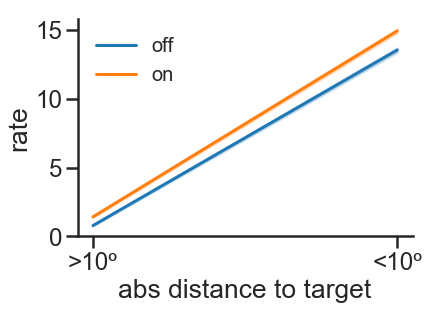

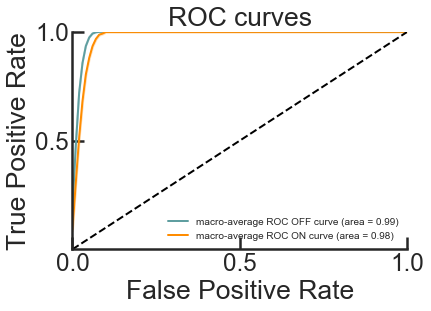

Ttest_indResult(statistic=-19.71768499920966, pvalue=1.165694864176382e-24)

In [13]:
plt.figure()
off = pd.DataFrame({'rate':X_off[0].values, 'target':pd.DataFrame(y_off_t)[0].values})
on = pd.DataFrame({'rate':X_on[0].values, 'target':pd.DataFrame(y_on_t)[0].values})
sns.lineplot(x='target', y='rate', data=off, label='off')
sns.lineplot(x='target', y='rate', data=on, label='on')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.xticks([0,1], ['>10º', '<10º'])
plt.xlabel('abs distance to target')
plt.legend(fontsize=20, frameon=False)
plt.show()


plt.figure()
lw = 2

fpr_mean_off = np.concatenate(fpr_mean_off)
tpr_mean_off = np.concatenate(tpr_mean_off)
df_ROC_OFF = pd.DataFrame({'fpr_mean': fpr_mean_off, 'tpr_mean': tpr_mean_off})
df_ROC_OFF = df_ROC_OFF.round(2)


sns.lineplot(x='fpr_mean', y='tpr_mean', data=df_ROC_OFF, color='cadetblue', 
             linestyle='--', linewidth=2, 
             label='macro-average ROC OFF curve (area = {0:0.2f})'''.format(np.mean(roc_mean_off)))



fpr_mean_on = np.concatenate(fpr_mean_on)
tpr_mean_on = np.concatenate(tpr_mean_on)
df_ROC_ON = pd.DataFrame({'fpr_mean': fpr_mean_on, 'tpr_mean': tpr_mean_on})
df_ROC_ON = df_ROC_ON.round(2)


sns.lineplot(x='fpr_mean', y='tpr_mean', data=df_ROC_ON, color='darkorange', 
             linestyle='--', linewidth=2, 
             label='macro-average ROC ON curve (area = {0:0.2f})'''.format(np.mean(roc_mean_on)))


###
plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
plt.xlim([0, 1])
plt.xticks([0, 0.5, 1])
plt.ylim([0, 1])
plt.yticks([0.5, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right", fontsize=10, frameon=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.show()
print('')
print('')

scipy.stats.ttest_ind(roc_mean_on, roc_mean_off)